In [ ]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time.
tf.random.set_seed(42)  # sets the graph-level random seed

In [ ]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest,Ytest) = mnist.load_data()

# Display size of dataset
Xtrain = Xtrain.reshape((60000,28,28,1))
Xtrain = Xtrain.astype('float32')/255

Xtest = Xtest.reshape((10000,28,28,1))
Xtest = Xtest.astype('float32')/255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [ ]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and specify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(16, (3,3), activation="relu",
                           input_shape=(28,28,1) ))
# 32 * (3 * 3 +1)
# fxf = 3x3
# number of kernels = 32

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 3
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu" ))

cnnModel.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModel.add(layers.Dense(64, activation="relu" ))

# Layer 5
cnnModel.add(layers.Dense(32, activation="relu" ))

# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))

cnnModel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy",
                 metrics = ["accuracy"])

In [ ]:
# train the model

history = cnnModel.fit(Xtrain, Ytrain, epochs = 25,
                       batch_size = 64, validation_split = 0.1)

Epoch 1/25
844/844 [==============================] - 28s 32ms/step - loss: 0.2661 - accuracy: 0.9180 - val_loss: 0.0673 - val_accuracy: 0.9813
Epoch 2/25
844/844 [==============================] - 27s 32ms/step - loss: 0.0747 - accuracy: 0.9761 - val_loss: 0.0614 - val_accuracy: 0.9808
Epoch 3/25
844/844 [==============================] - 27s 32ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0558 - val_accuracy: 0.9827
Epoch 4/25
844/844 [==============================] - 27s 32ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0379 - val_accuracy: 0.9897
Epoch 5/25
844/844 [==============================] - 28s 33ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0466 - val_accuracy: 0.9863
Epoch 6/25
844/844 [==============================] - 27s 31ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0406 - val_accuracy: 0.9888
Epoch 7/25
844/844 [==============================] - 28s 33ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0358 - val_accuracy:

In [ ]:
# Print final training loss and accuracy
print('Final training loss:', history.history['loss'][-1])
print('Final training accuracy:', history.history['accuracy'][-1])

Final training loss: 0.0030920153949409723
Final training accuracy: 0.9990741014480591


In [ ]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9905


In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.045353908091783524
Testing accuracy  0.9904999732971191


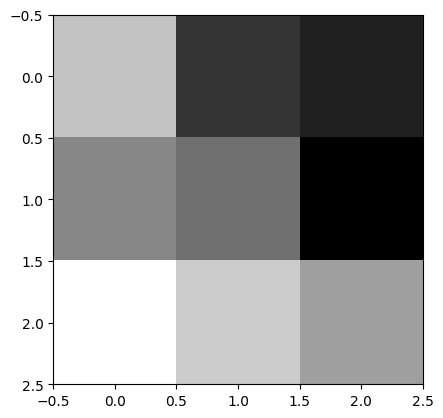

In [ ]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

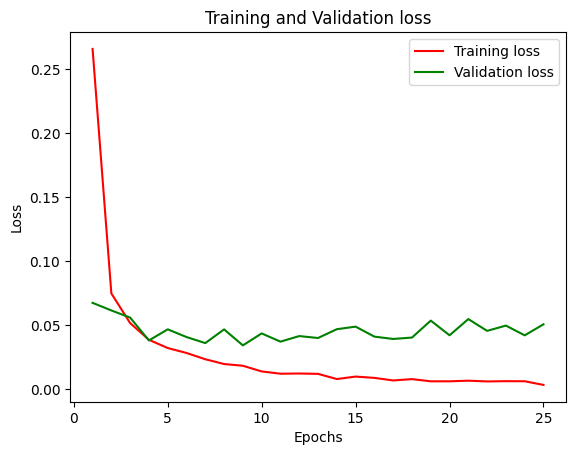

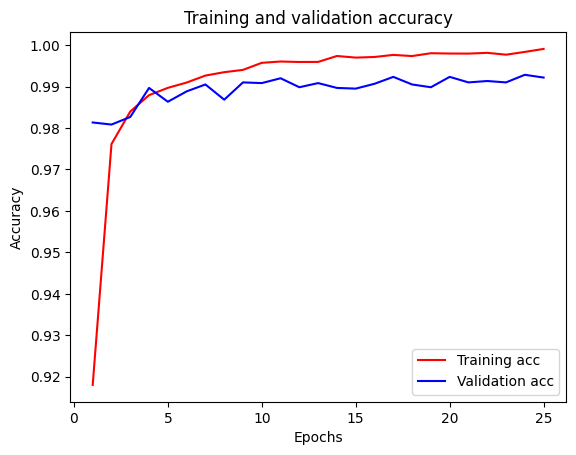

In [ ]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

accuracy = history.history['accuracy']  # Change 'acc' to 'accuracy'
val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'

plt.plot(epochs, accuracy, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
Y_prediction = cnnModel.predict(Xtest)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_prediction, axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest,axis = 1)



313/313 [==============================] - 2s 5ms/step


In [ ]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



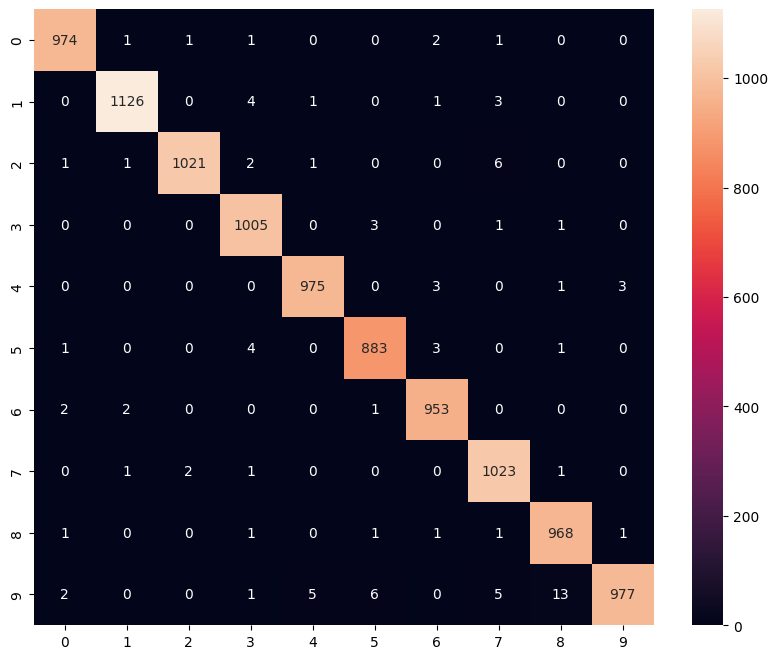

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

Modify the code as per the below instructions-

Use a different dataset.
Modify the architecture, as below
Conv Max Conv Max Conv Max Flatten FC FC
Conv Conv Max Conv Conv Max Flatten Global Avg Pooling
Change the number of kernels and kernel size.

In this modified code:

- Have changed the dataset to Fashion MNIST to use a different dataset.
Modified the architecture of the CNN to Conv Max Conv Max Conv Max Flatten FC FC.
- Changed the number of kernels and kernel size in the convolutional layers.
- Included plotting of training and validation loss, and training and validation accuracy.
- Evaluated the model on the test dataset and printed testing loss and accuracy.
- Displayed the weights of the first convolutional layer as a gray map.
- Printed the classification report and displayed the confusion matrix.


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856 

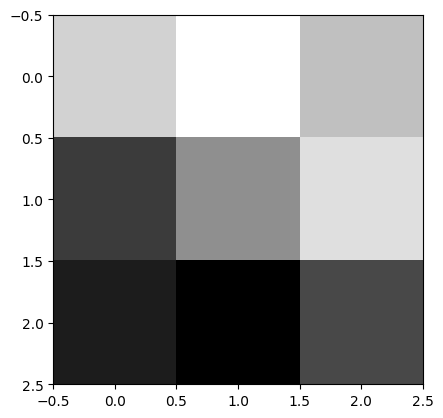

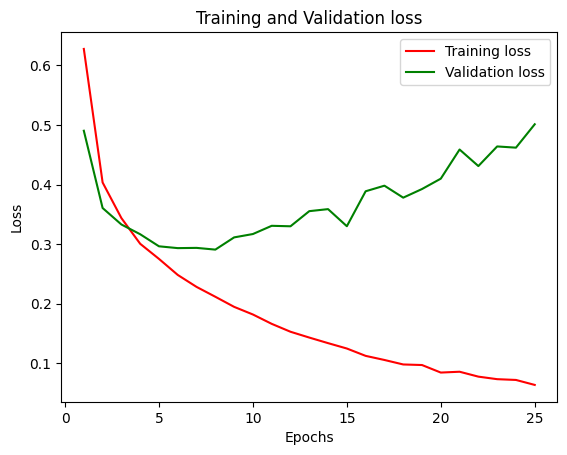

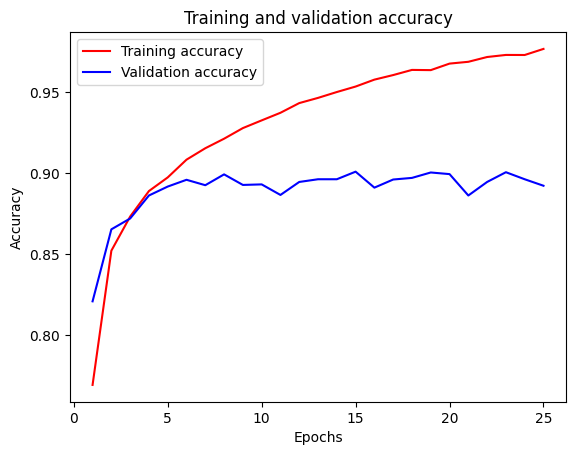

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.81      0.83      1000
           3       0.91      0.88      0.89      1000
           4       0.82      0.85      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.65      0.74      0.69      1000
           7       0.93      0.97      0.95      1000
           8       0.95      0.98      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



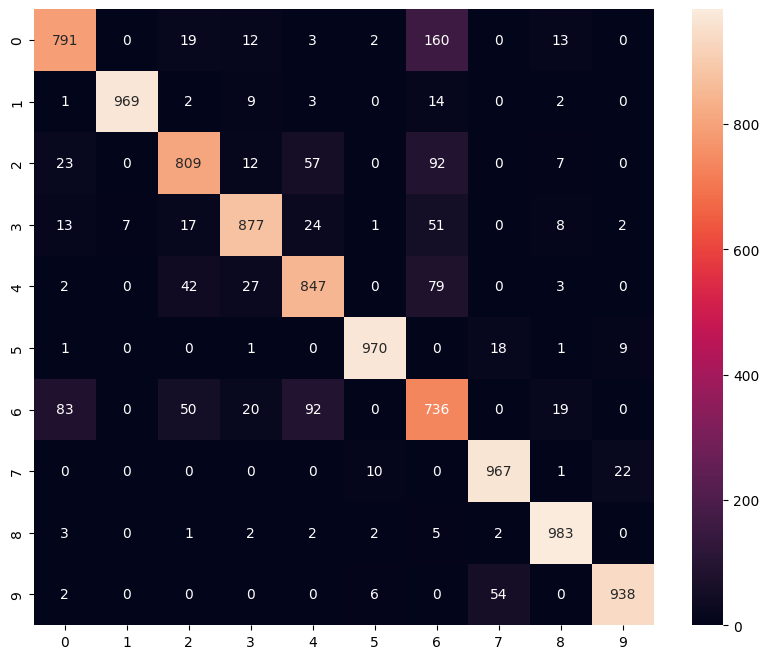

In [ ]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Use a different dataset
mnist = tf.keras.datasets.fashion_mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

# Display size of dataset
Xtrain = Xtrain.reshape((60000, 28, 28, 1))
Xtrain = Xtrain.astype('float32') / 255

Xtest = Xtest.reshape((10000, 28, 28, 1))
Xtest = Xtest.astype('float32') / 255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

# Create a Sequential model object
cnnModel = models.Sequential()

# Modify the architecture
# Conv Max Conv Max Conv Max Flatten FC FC
cnnModel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dense(256, activation='relu'))
cnnModel.add(layers.Dense(128, activation='relu'))
cnnModel.add(layers.Dense(10, activation='softmax'))

cnnModel.summary()

# Configure the model for training
cnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnnModel.fit(Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)

# Print final training loss and accuracy
print('Final training loss:', history.history['loss'][-1])
print('Final training accuracy:', history.history['accuracy'][-1])

# Testing the model
testLoss, testAccuracy = cnnModel.evaluate(Xtest, Ytest)

print('Testing loss:', testLoss)
print('Testing accuracy:', testAccuracy)

# Shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

# Plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accuracy, color='red', label='Training accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Convert predictions classes to one hot vectors
Y_prediction = cnnModel.predict(Xtest)
Y_pred_classes = np.argmax(Y_prediction, axis=1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest, axis=1)

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.show()
